Основные цели этого задания:

Научиться работать с документацией scikit-learn

Научиться готовить данные к обучению модели и к ее валидации

Научиться оценивать качество модели и выбирать лучшую модель, опираясь на метрики

Задача:

Построить модель машинного обучения для решения задачи регрессии: необходимо спрогнозировать прогресс заболевания диабетом через год после исходного уровня.

План решения:

В документации библиотеки scikit learn найдите, как загрузить датасет для построения модели прогноза прогрессирования заболевания через год после исходного уровня.

Выведите содержимое поля DESCR, которое вернет функция, загружающая датасет, чтобы изучить содержимое датасета.

Подготовьте данные к обучению моделей: отделите целевой признак от датасета, разделите датасет на тренировочную и валидационную части.

Обучите решающее дерево и оцените адекватность обученной модели. Для этого достаточно сравнить метрики качества с метриками, получаемыми от простой модели. Например, если бы мы подавали на вход среднее значение целевой переменной на обучающей части выборки.

Обучите линейную регрессию и оцените ее адекватность.

Выберите лучшую модель и обоснуйте свой выбор.

In [31]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from matplotlib import pyplot as plt
import pandas as pd

In [2]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
df = load_iris(as_frame=True).frame

In [4]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
89,5.5,2.5,4.0,1.3,1
71,6.1,2.8,4.0,1.3,1
27,5.2,3.5,1.5,0.2,0
88,5.6,3.0,4.1,1.3,1
140,6.7,3.1,5.6,2.4,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
for t in df['target'].unique():
    print(f'==Class {t}==')
    display(df.query(f'target == {t}').describe().loc[['min', 'mean', 'max'], :])

==Class 0==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.300,2.300,1.000,0.100,0.0
mean,5.006,3.428,1.462,0.246,0.0
max,5.800,4.400,1.900,0.600,0.0


==Class 1==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.900,2.00,3.00,1.000,1.0
mean,5.936,2.77,4.26,1.326,1.0
max,7.000,3.40,5.10,1.800,1.0


==Class 2==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.900,2.200,4.500,1.400,2.0
mean,6.588,2.974,5.552,2.026,2.0
max,7.900,3.800,6.900,2.500,2.0


In [9]:
features = df.drop(['target'], axis=1)
target = df['target']

print(features.shape)
print(target.shape)

(150, 4)
(150,)


In [10]:
model = tree.DecisionTreeClassifier()
model.fit(features, target)

print(model)

DecisionTreeClassifier()


In [11]:
new_features = pd.DataFrame(
    [
        [5.00500, 3.428000, 1.462000, 0.246000],
        [5.936000, 2.770000, 4.260000, 1.326000],
        [6.58800, 2.974000, 5.552000, 2.02600],
     ], columns=features.columns
)

answers = model.predict(new_features)
print(answers)

[0 1 2]


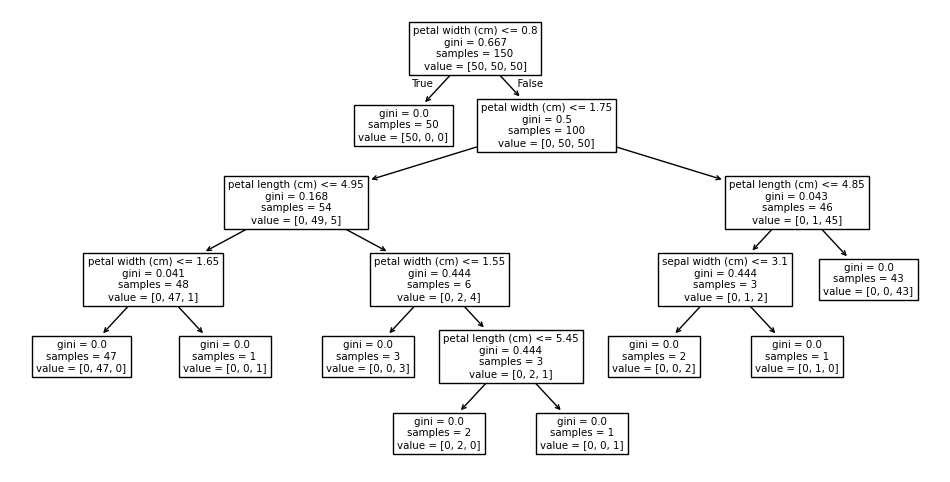

In [15]:
plt.figure(figsize=[12, 6])
tree.plot_tree(model, feature_names=features.columns)
plt.show()

In [20]:
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=.3, random_state=45)

In [21]:
target_train.value_counts(normalize=True).sort_index()

target
0    0.314286
1    0.352381
2    0.333333
Name: proportion, dtype: float64

In [22]:
target_val.value_counts(normalize=True).sort_index()

target
0    0.377778
1    0.288889
2    0.333333
Name: proportion, dtype: float64

In [23]:
model = tree.DecisionTreeClassifier()
model.fit(features_train, target_train)
predictions_val = model.predict(features_val)

def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print('Ошибок:', count_errors(target_val, predictions_val))

Ошибок: 2


In [25]:
def accuracy(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    correct_answers_list = [1 if v[0] == v[1] else 0 for v in all_answers_together]
    return sum(correct_answers_list) / len(correct_answers_list)

print('Accuracy:', accuracy(target_val, predictions_val))

Accuracy: 0.9555555555555556


In [26]:
print('Accuracy test built-in:', accuracy_score(target_val, predictions_val))

predictions_train = model.predict(features_train)
print('Accuracy train built-in:', accuracy_score(target_train, predictions_train))

Accuracy test built-in: 0.9555555555555556
Accuracy train built-in: 1.0


In [27]:
confusion_matrix(target_val, predictions_val)

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 13]])

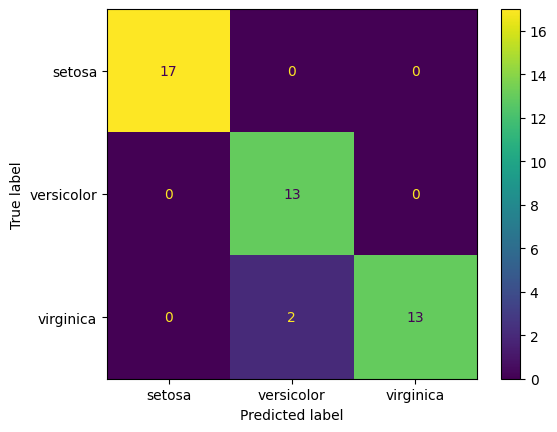

In [29]:
ConfusionMatrixDisplay(confusion_matrix(target_val, predictions_val), display_labels=['setosa', 'versicolor', 'virginica']).plot()

In [30]:
virginica_tp = 13
virginica_true_total = 15
virginica_prediction_total = 13
virginica_precision = virginica_tp / virginica_prediction_total 
virginica_recall = virginica_tp / virginica_true_total
print('Virginica precision', virginica_precision)
print('Virginica recall', virginica_recall)

Virginica precision 1.0
Virginica recall 0.8666666666666667
